Подключение библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Подготовка набора данных

In [2]:
# Считывание таблицы
NHL = pd.read_csv("Data/NHL.csv", delimiter=',', encoding='latin-1')
# Удаление лишних столбцов
NHL = NHL.drop(['Rk', 'Age', 'Tm', 'PS', 'EV', 'PP', 'SH', 'GW', 'EV.1', 'PP.1', 'SH.1', 'TOI', 'HART', 'Votes'],
               axis=1)
# Форматирование столбца "Player"
NHL['Player'] = NHL['Player'].str.extract(r'([^\\]+(?=\\))', expand=False)

gp = 20  # Количество проведенных игр

# Удаление строк, не удовлетворяющих условиям
NHL = NHL.drop(NHL[(NHL.GP < gp)].index)
# Удаление столбца "Season"
NHL = NHL.drop('Season', axis=1)
# Удаление повторений в столбце Player
NHL = NHL.drop_duplicates(subset=['Player'])
# Обновление индексов
NHL = NHL.reset_index(drop=True)
# Замена позиций: 
#   RW, LW, LW/RW -> W
NHL = NHL.replace(['RW', 'LW', 'LW/RW'], 'W')
#   C/LW, LW/C -> C/W 
NHL = NHL.replace(['C/LW', 'LW/C'], 'W')
# Изменение порядка столбцов
NHL_data = NHL.reindex(columns=['GP', 'G', 'A','PTS','plusminus','PIM','S','S_percent','ATOI','BLK','HIT','FOW','FOL','FO_percent','Player','Pos'])


Разделение набора данных на атрибуты и метки

In [3]:
# Атрибуты
atrb = NHL_data.iloc[:, :-2]
# Метки
y = pd.core.frame.DataFrame(NHL_data.iloc[:,-1])
y.Pos.unique()

array(['C', 'W', 'D'], dtype=object)

Тестовый сплит

In [4]:
# test_size показывает, какой объем данных нужно выделить для тестового набора
X_train, X_test, y_train, y_test = train_test_split(atrb, y, test_size = 0.20)

Масштабирование функций

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Обучение и прогнозы

Многослойный персептрон

In [6]:
max = 0
for k in range(5, 105, 5):
    MLP_model = MLPClassifier(hidden_layer_sizes=(k, k, k), max_iter=50000)
    MLP_model.fit(X_train, y_train.values.ravel())
    MLP_prediction = MLP_model.predict(X_test)
    if accuracy_score(MLP_prediction, y_test) > max:
        max = accuracy_score(MLP_prediction, y_test)
        hid_n = k
        MLP_optimal = MLP_model
print(f"Optimal hidden_layer_size: {hid_n} -> Accuracy: {max}")

Optimal hidden_layer_size: 10 -> Accuracy: 0.8385416666666666


Метод k-ближайших соседей (K-Nearest Neighbors)

In [7]:
# В KNN-модели нужно указать параметр n_neighbors
# Это число точек, на которое будет смотреть
# классификатор, чтобы определить, к какому классу принадлежит новая точка
max = 0
for k in range(1, 70):
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(X_train, y_train.values.ravel())
    KNN_prediction = KNN_model.predict(X_test)
    if accuracy_score(KNN_prediction, y_test) > max:
        max = accuracy_score(KNN_prediction, y_test)
        n_neigb = k
        KNN_optimal = KNN_model
print(f"Optimal n_neighbors: {n_neigb} -> Accuracy: {max}")

Optimal n_neighbors: 42 -> Accuracy: 0.8151041666666666


Оценки алгоритмов

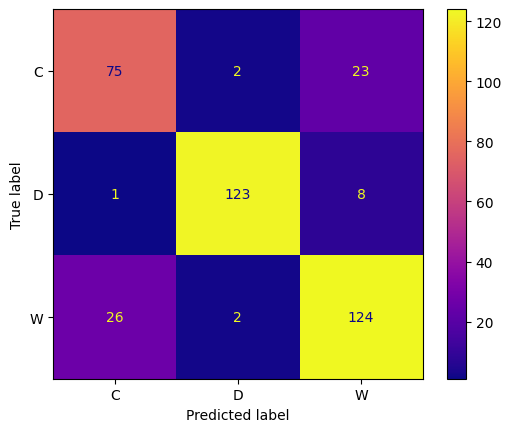

              precision    recall  f1-score   support

           C       0.64      0.67      0.65       100
           D       0.98      0.95      0.97       132
           W       0.76      0.76      0.76       152

    accuracy                           0.80       384
   macro avg       0.79      0.79      0.79       384
weighted avg       0.81      0.80      0.80       384



In [8]:
ConfusionMatrixDisplay.from_estimator(MLP_optimal, X_test, y_test, cmap='plasma')  
plt.show()
print(classification_report(y_test,MLP_prediction)) 

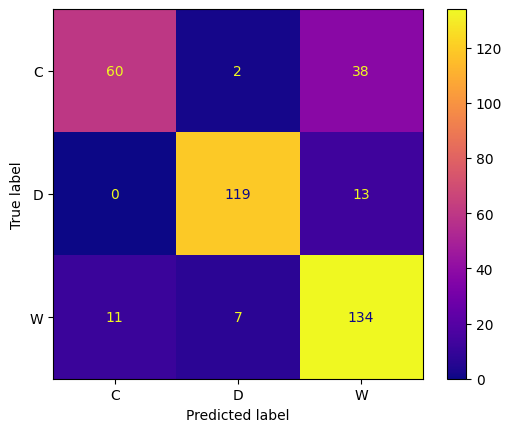

              precision    recall  f1-score   support

           C       0.85      0.51      0.64       100
           D       0.91      0.89      0.90       132
           W       0.69      0.88      0.77       152

    accuracy                           0.79       384
   macro avg       0.82      0.76      0.77       384
weighted avg       0.81      0.79      0.78       384



In [9]:
ConfusionMatrixDisplay.from_estimator(KNN_optimal, X_test, y_test, cmap='plasma') 
plt.show()
print(classification_report(y_test,KNN_prediction)) 